
> # Airline Passenger Satisfaction Prediction

# Problem Statement:
* To improve the airline services and passenger's satisfaction, it is important to analysis the airline passenger satisfaction level and predict the passenger's satisfaction. 
* This problem comes under the classification problem where we have to predict whether airline passengers are satisfied or neutral_ or_dissatisfaction

# Objective:
* To identify the factors that are highly correlated to a satisfied (or dissatisfied) passenger.
* To predict passenger satisfaction

# Solution:
* Perform EDA (Data Analysis,Data Visualization, Data Cleaning) to understand the data and to clean the dataset for further process
* Train the classification model
* Perform Prediction
* Model Evaluation
* Conclusion

# Hypothesis Generation: 

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which might be can affect the passenger's satisfaction (dependent variable for Airline passenger satisfaction prediction problem):


* **Class:** Satisfaction level of Business class passengers have more chances to be high

* **Inflight wifi service:** Passenger's Satisfaction maybe depends on inflight wifi service level  

* **Ease of Online booking:** Satisfaction also depends on the level of how ease to book tickets online 

* **Online boarding:** Passenger's satisfaction may be depends on Satisfaction level of online boarding

* **Seat comfort:** While traveling comfort of the Seat are important factor so, the passenger's satisfaction should be depends of the level of seat comfort

* **Inflight service:** Quality of inflight service should considerable factor for passenger's satisfaction

* **Cleanliness:** Who don't like to travel in cleaned transport medium, so it maybe important factor

* **Departure/Arrival time convenient:**  Departure/Arrival time convenient maybe plays important role in terms of the passenger's satisfaction



# Dataset:

* This dataset contains an airline passenger satisfaction survey, having 103,904 rows and 25 columns in train dataset and 25,976 rows and 25 columns in test dataset


#### Description about each columns 
* **Gender:** Gender of the passengers (Female, Male)

* **Customer Type:** The customer type (Loyal customer, disloyal customer)

* **Age:** The actual age of the passengers

* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance:** The flight distance of this journey

* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking:** Satisfaction level of online booking

* **Gate location:** Satisfaction level of Gate location

* **Food and drink:** Satisfaction level of Food and drink

* **Online boarding:** Satisfaction level of online boarding

* **Seat comfort:** Satisfaction level of Seat comfort

* **Inflight entertainment:** Satisfaction level of inflight entertainment

* **On-board service:** Satisfaction level of On-board service

* **Leg room service:** Satisfaction level of Leg room service

* **Baggage handling:** Satisfaction level of baggage handling

* **Check-in service:** Satisfaction level of Check-in service

* **Inflight service:** Satisfaction level of inflight service

* **Cleanliness:** Satisfaction level of Cleanliness

* **Departure Delay in Minutes:** Minutes delayed when departure

* **Arrival Delay in Minutes:** Minutes delayed when Arrival

* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# Packages

In [1]:
import numpy as np                       
import pandas as pd                     
import seaborn as sns                  
import matplotlib.pyplot as plt         
import scipy                            
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings                       # To ignore any warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data

For this problem, we have been given two CSV files:

**train.csv** : will be used for training the model, i.e. our model will learn from this file.

**test.csv**: will apply the model to predict the passenger's satisfaction

### Train dataset

In [2]:
airline_train_df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
airline_train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Test dataset

In [3]:
airline_test_df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
airline_test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
# Generate copy 
train_data = airline_train_df.copy()
test_data = airline_test_df.copy()

# Exploratory Data Analysis (EDA)

In [5]:
# Information about all the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

**Observation:**

* There are 103904 rows and 25 columns
* Out of 25 columns, 5 features are of object type , and all others are numerical type (int,float)
* Arrival Delay in Minutes having some null values 

In [6]:
train_data.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:
train_data.duplicated().sum()

0

**Observations:**

* There is no duplicate rows in the dataset

## Target variable

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

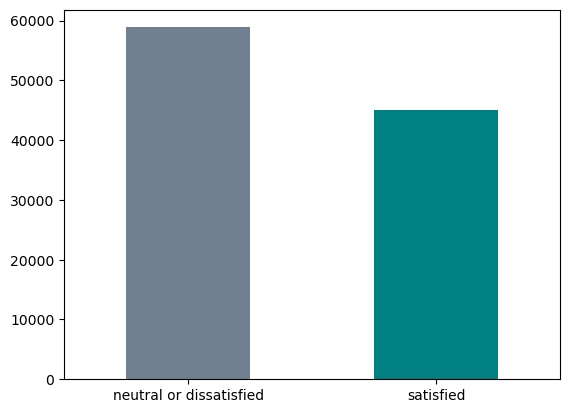

In [8]:
train_data['satisfaction'].value_counts(normalize = True)*100
train_data['satisfaction'].value_counts().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)

**Observation :**

* 43.33% of passengers are satisfied with the airline services
* 56.67% of passengers are neutral or dissatisfied by airline services


## Independent Variables (Numerical)

Some of the features are numerical type: Age, Flight Distance,Arrival Delay in Minutes, Departure Delay in Minutes

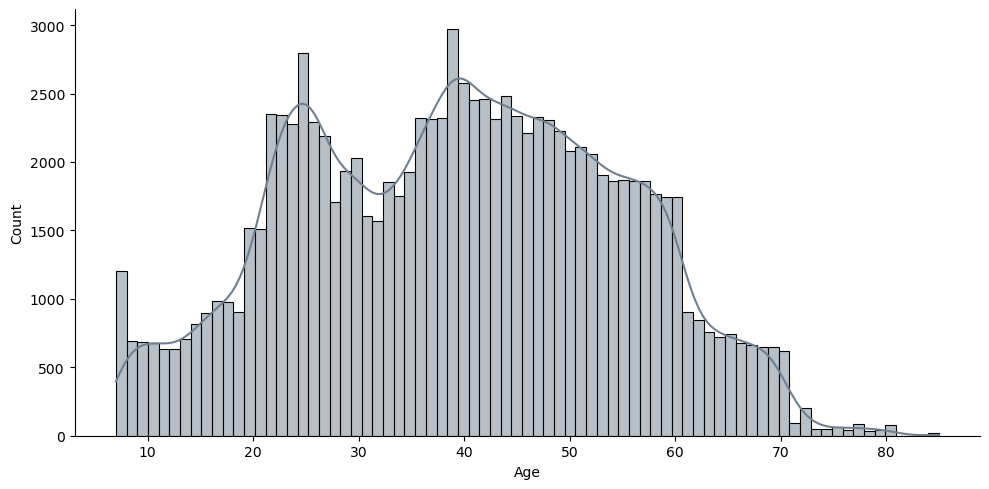

In [9]:
sns.displot(train_data['Age'],kde=True,aspect=2,color='slategray')

**Observation :**

* More than 2000 passengers are fall in age range of 23 to 27 years old and 35 to 45 years old

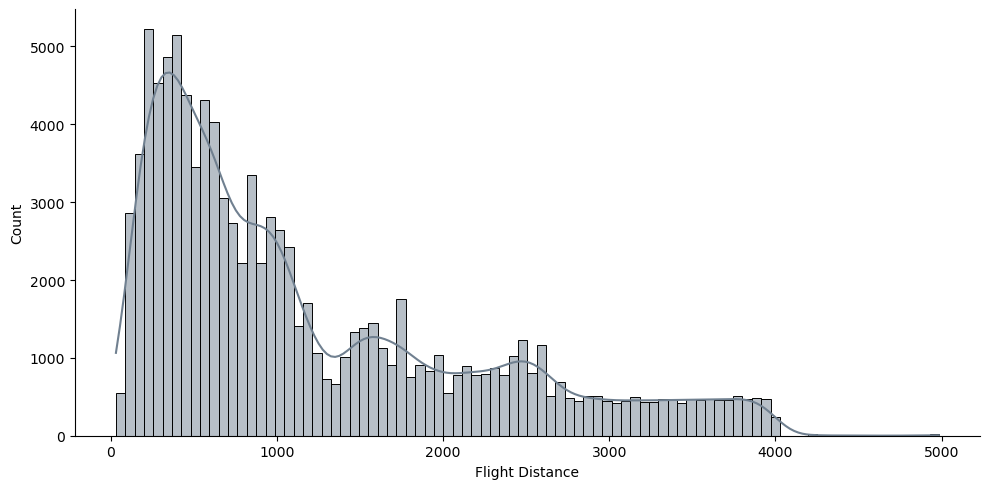

In [10]:
sns.displot(train_data['Flight Distance'],kde=True,aspect=2, color='slategray')

**Observation :**

* more than 4000 passengers are travel for approx <800 flight distance 

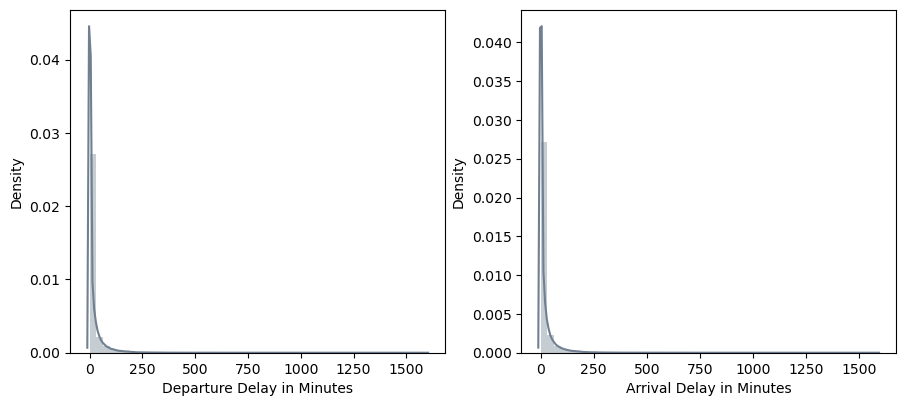

In [11]:
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(train_data['Departure Delay in Minutes'],color='slategray')
plt.subplot(122)
sns.distplot(train_data['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)

**Observation :**

* The maximum departure delay and arrival delay are for approx 0 to 10 mins
* We can say that most of the time there are no delay

## Indepentant variable (Categorical : Nominal)

Some of features are nominal: Gender, Customer Type, Type of Travel, Class 

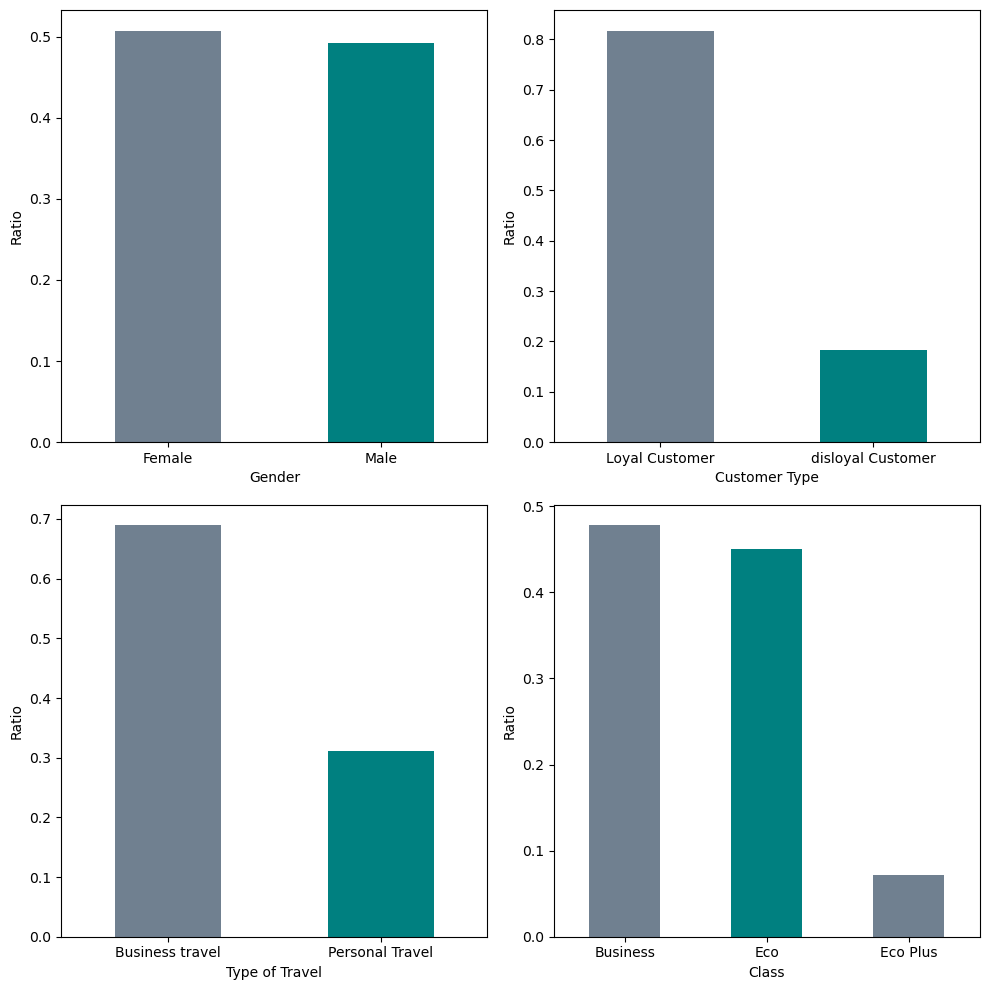

In [12]:
plt.figure(1,figsize=(10,10))
plt.subplot(221)
train_data['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

plt.subplot(222)
train_data['Customer Type'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Customer Type')
plt.ylabel('Ratio')

plt.subplot(223)
train_data['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')


plt.subplot(224)
train_data['Class'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Class')
plt.ylabel('Ratio')


plt.tight_layout()

**Observation:**
* There are 51% Female passengers 
* 82% of passengers are Loyal customer 
* 69% of passengers are traveling for Business purpose 
* 48% passengers are travel in business class and 45% in Eco

## Independent Variable (Categorical : Ordinal)

Ordinal Features: Inflight wifi service,'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'

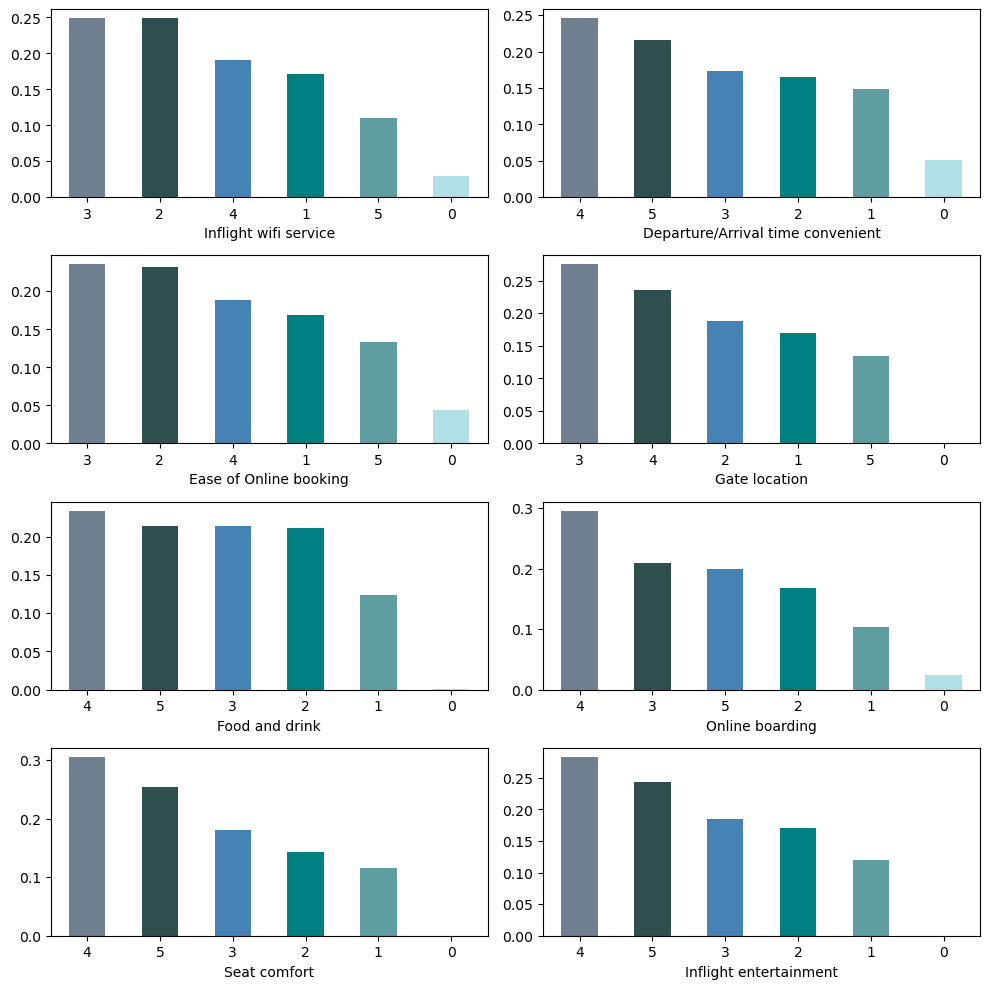

In [13]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
train_data['Inflight wifi service'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
train_data['Departure/Arrival time convenient'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
train_data['Ease of Online booking'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
train_data['Gate location'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
train_data['Food and drink'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
train_data['Online boarding'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
train_data['Seat comfort'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
train_data['Inflight entertainment'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')


plt.tight_layout()


**Observation:**
* Approx 25% passengers rated 3 and 25% of it rated 2 for Inflight wifi service
* 24% passengers rated 4 to Departure/Arrival time convenient and 21% of passengers rated 5 for the same
* Approx 23% passengers rates 3 to Ease of Online booking as well as 23% of them rates 2 
* 27.5% passengers gives 3 rating for the Gate location 
* For food and drink service 23% of ratings = 4
* For Online Boarding approx 30% of passengers gave 4 ratings
* For Seat comfort most of the passengers having satifactory level of 4
* Approx 28% of Passengers gave 4 ratings to Inflight entertainment

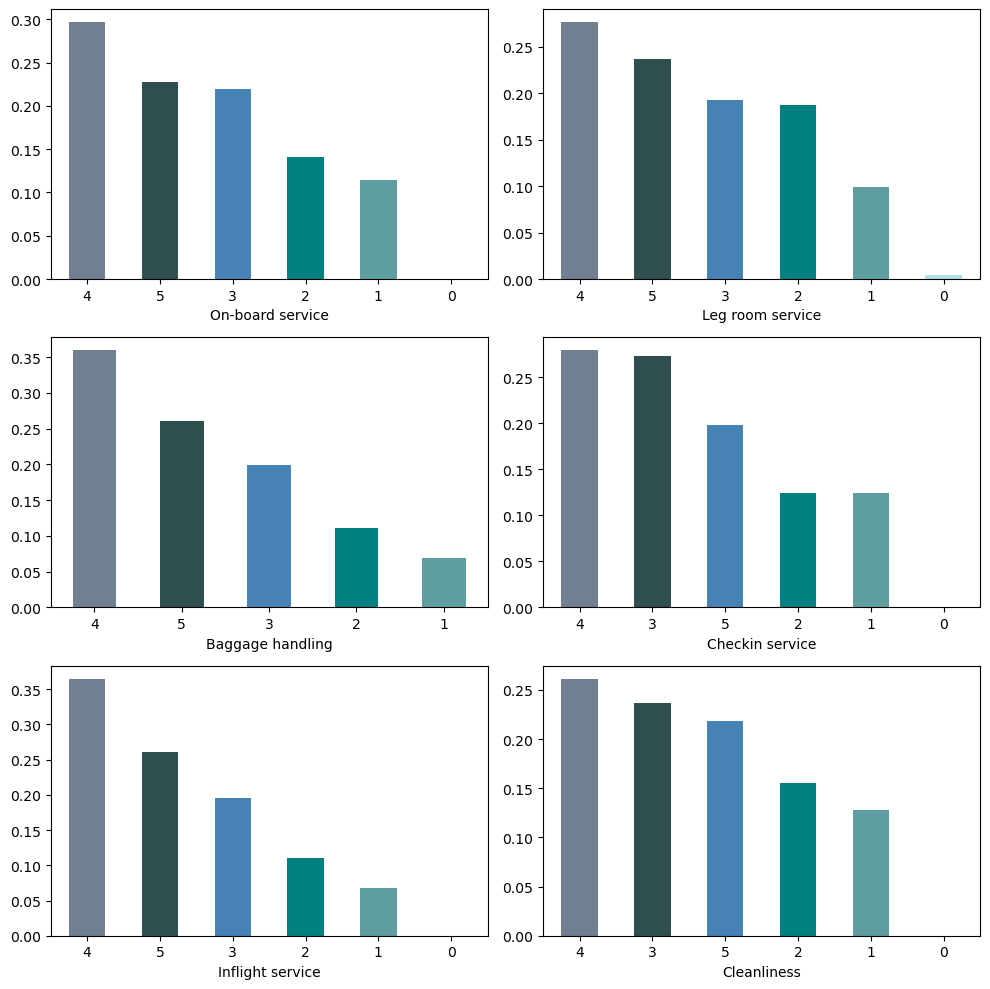

In [14]:
plt.figure(1,figsize=(10,10))
plt.subplot(321)
train_data['On-board service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('On-board service')

plt.subplot(322)
train_data['Leg room service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Leg room service')

plt.subplot(323)
train_data['Baggage handling'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Baggage handling')

plt.subplot(324)
train_data['Checkin service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Checkin service')

plt.subplot(325)
train_data['Inflight service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight service')

plt.subplot(326)
train_data['Cleanliness'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Cleanliness')


plt.tight_layout()

**Observation:**
* Aprox 30% passengers gave 4 ratings to On-board service
* 28% of passengers rates 4 for Leg room service
* For 'Baggage handling' 36% people gave 4 ratings
* 27% passengers gave 4 ratings for'Checkin service'
* 36%  passengers gave 4 ratings for Inflight service
* For Cleanliness 26% of passengers rates 4


## Categorical Independent Variable (Nomial) v/s Target Variable

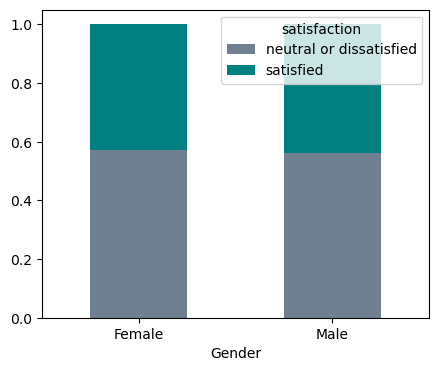

In [15]:
Gender=pd.crosstab(train_data['Gender'],train_data['satisfaction']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Gender');

**Observation:**
* 57% Female passengers were neutral or dissatisfied
* 56% Male passengers were neutral or dissatisfied

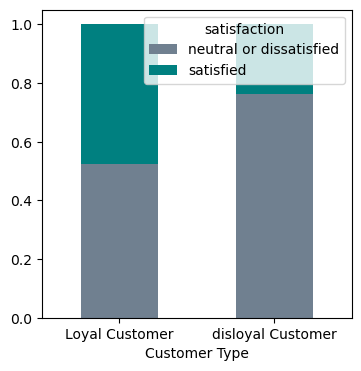

In [16]:
Customer_Type=pd.crosstab(train_data['Customer Type'],train_data['satisfaction']) 
Customer_Type.div(Customer_Type.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Customer Type');

**Observation:**
* 52% Loyal customer were neutral or dissatisfied
* 76% disloyal customers were neutral or dissatisfied

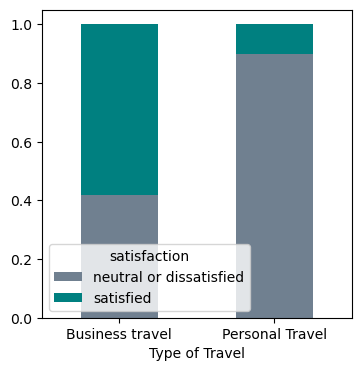

In [17]:
Type_Travel=pd.crosstab(train_data['Type of Travel'],train_data['satisfaction']) 
Type_Travel.div(Type_Travel.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Type of Travel');


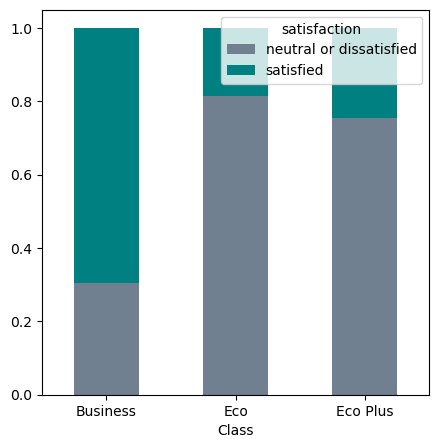

In [18]:
clss=pd.crosstab(train_data['Class'],train_data['satisfaction']) 
clss.div(clss.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,5),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Class');

**Observation:**
* 69% Business class passengers were satisfied
* 81% Eco class passengers were neutral or dissatisfied
* 75% Eco Plus class passengers were neutral or dissatisfied

## Numerical Independent Variable vs Target Variable¶


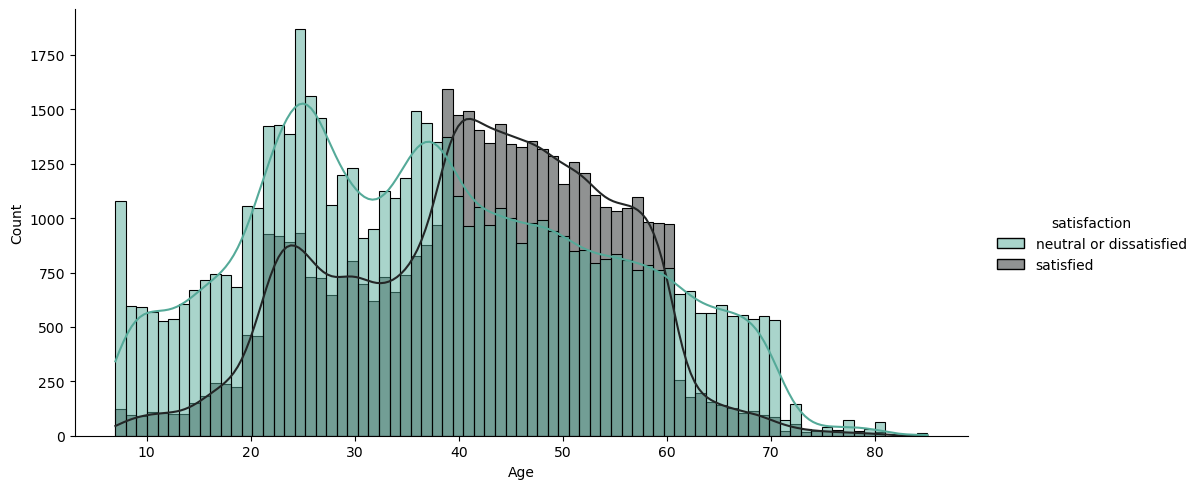

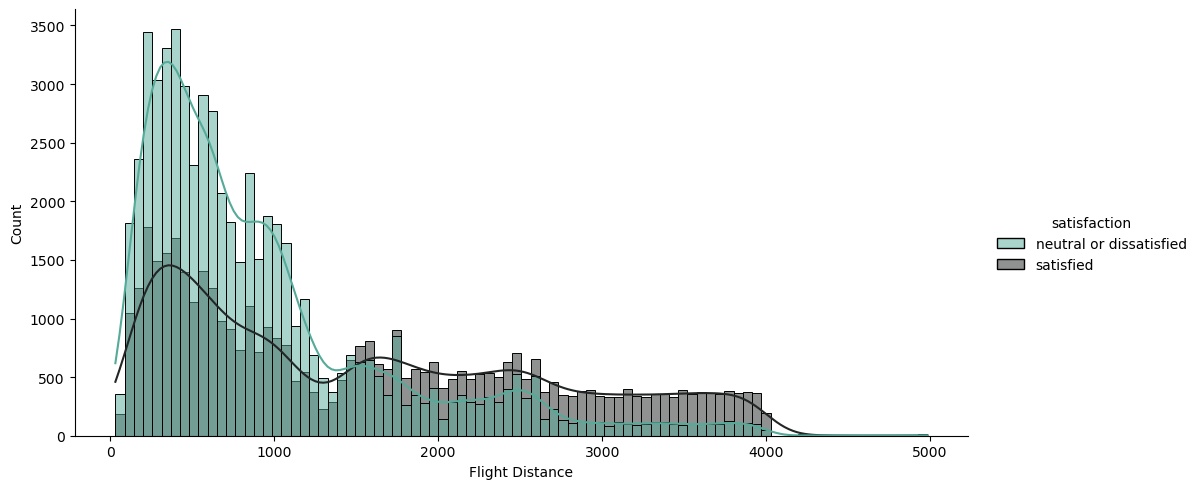

In [19]:
sns.displot(x=train_data['Age'],hue=train_data['satisfaction'],kde=True,aspect=2,palette='dark:#5A9_r')

sns.displot(x=train_data['Flight Distance'],hue=train_data['satisfaction'],kde=True,aspect=2,palette='dark:#5A9_r')


**Observation:**
* Approx 21 to 36 years old passengers were neutral or dissatisfied 
* And approx 39 to 50 years old passengers were satisfied
* Passengers with long flight distance are more satisfied than passengers having short flight distance 

In [20]:
train_data.groupby('satisfaction')['Departure Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    16.503728
satisfied                  12.608084
Name: Departure Delay in Minutes, dtype: float64

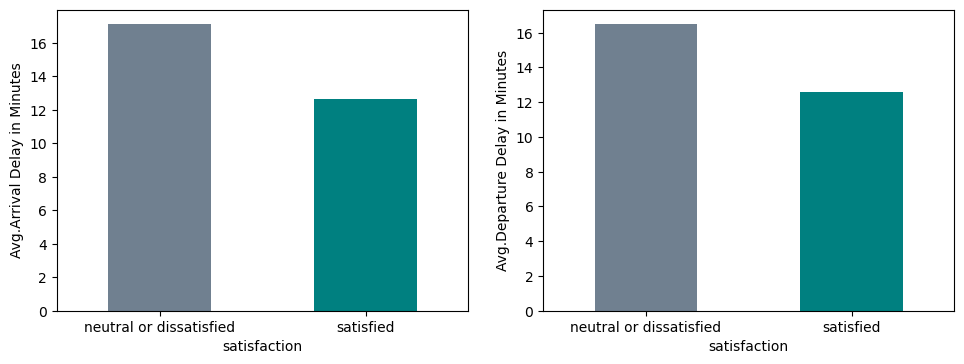

In [21]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
train_data.groupby('satisfaction')['Arrival Delay in Minutes'].mean().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.ylabel('Avg.Arrival Delay in Minutes')
           
plt.subplot(122)
train_data.groupby('satisfaction')['Departure Delay in Minutes'].mean().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.ylabel('Avg.Departure Delay in Minutes')

plt.tight_layout(pad=2)

**Observation:**
* mean of arrival delay for neutral or dissatisfied is approx 17 and 12 for satisfied
* mean of departure delay for neutral or dissatisfied is approx 16

## Correlation

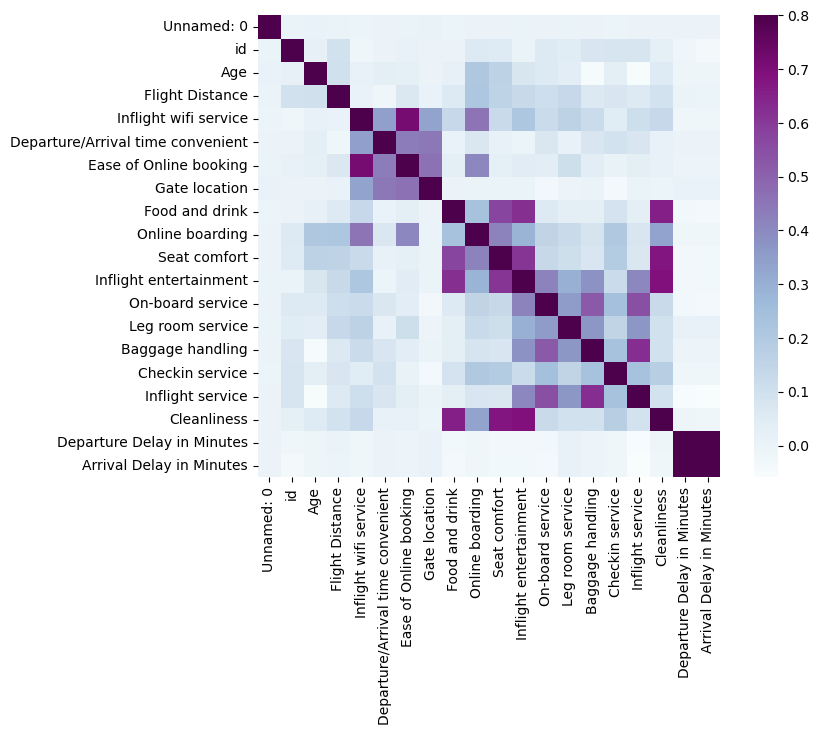

In [22]:
matrix = train_data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

**Observation:**
* Inflight wifi service and ease of online booking is strongly correlated with each other
* Departure Delay in mins and Arrival delay in mins are highly correlated to each other
* Cleanliness, food and drink, seat comfort and inflight entertainment are approx 65% correlated with each other
* Inflight service, Baggage handling,on-board service are approx 60% correlated


## Missing value imputation


In [23]:
train_data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [24]:
test_data.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


**Observation:**
* Arrival delay in minutes having 310 missing values in train dataset
* Departure Delay in Minutes having 83 missing vaalues in test dataset
* Let's try to fill these null values with appropiate value

## Fill null values in train and test dataset

In [25]:
train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].mode()[0], inplace=True)
train_data['Arrival Delay in Minutes']=train_data['Arrival Delay in Minutes'].astype(int)

In [26]:
test_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].mode()[0], inplace=True)
test_data['Arrival Delay in Minutes']=test_data['Arrival Delay in Minutes'].astype(int)

In [27]:
train_data.isna().sum().sum() , test_data.isna().sum().sum()

(0, 0)

## Checking Outliers and it's Treatment

### For all Nomial features

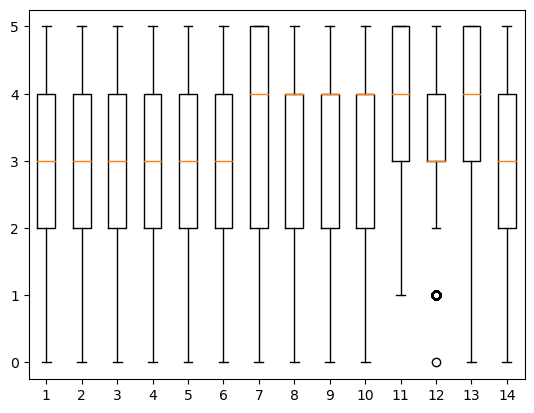

In [28]:
plt.boxplot(train_data[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]);

In [29]:
train_data['Checkin service'].value_counts()        

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64

**Observation:**
* As you can see checkin service attribute having few outlier so if we remove this data it doesn't affected to the main data

In [30]:
train_data.drop(train_data[train_data['Checkin service']==0].index,inplace=True)  # remove outliers

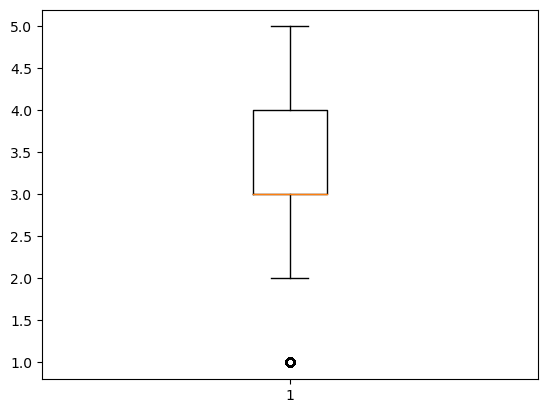

In [31]:
plt.boxplot(train_data['Checkin service']);

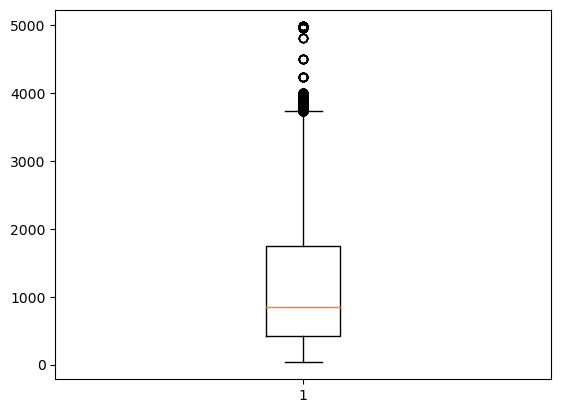

In [32]:
plt.boxplot(train_data['Flight Distance']);

**Observation:**
* In flight distance attribute there are more outliers so we cann't delete the outliers directly
* To treat this we are going to use boxcox it only works with value > 0

In [33]:
train_data['Flight Distance'] = scipy.stats.boxcox(train_data['Flight Distance'])[0]

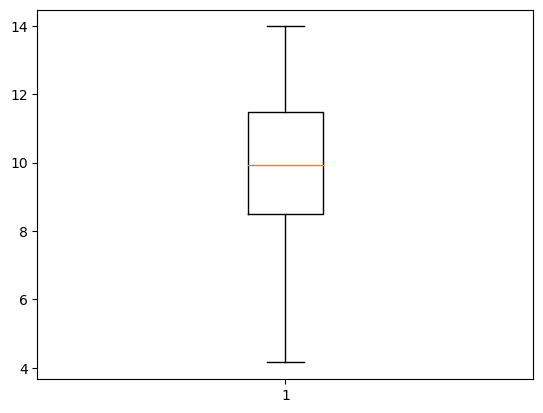

In [34]:
plt.boxplot(train_data['Flight Distance']);

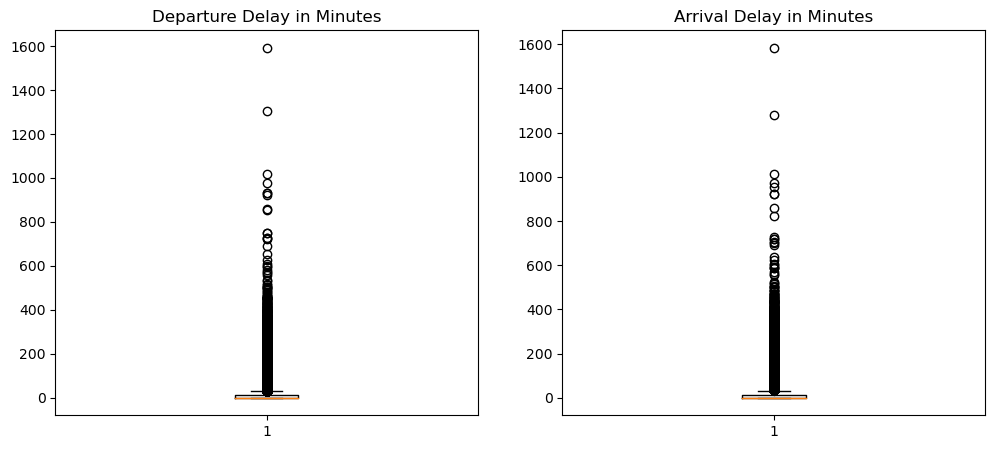

In [35]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
plt.boxplot(train_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes')
plt.subplot(122)
plt.boxplot(train_data['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes');

**Observation:**
* As you can see in Departure Delay in Minutes and Arrival Delay in Minutes having so many outliers 
* But we cann't remove it directly and also we cann't treat this with boxcox as it does not support value = 0
* So to treat this kind of outliers we need to calculate interquartile range (IQR) and from this find upper and lower boundary weight
* After finding upper and lower boundary value we substitute upper outliers with upper boundary value and lower outliers with lower boundary value
* Here we only have upper outliers so only need to replace outliers with upper boundary value

In [36]:
#  outlier treatment for Departure Delay in Minutes

IQR= train_data['Departure Delay in Minutes'].quantile(0.75) - train_data['Departure Delay in Minutes'].quantile(0.25)
lower_bridge= train_data['Departure Delay in Minutes'].quantile(0.25)-(IQR*1.5)
upper_bridge= train_data['Departure Delay in Minutes'].quantile(0.75)+(IQR*1.5)
train_data.loc[train_data['Departure Delay in Minutes']>upper_bridge,'Departure Delay in Minutes'] = upper_bridge

In [37]:
#  outlier treatment for Arrival Delay in Minutes

IQR= train_data['Arrival Delay in Minutes'].quantile(0.75) - train_data['Arrival Delay in Minutes'].quantile(0.25)
lower_bridge= train_data['Arrival Delay in Minutes'].quantile(0.25)-(IQR*1.5)
upper_bridge= train_data['Arrival Delay in Minutes'].quantile(0.75)+(IQR*1.5)
train_data.loc[train_data['Arrival Delay in Minutes']>upper_bridge,'Arrival Delay in Minutes'] = upper_bridge

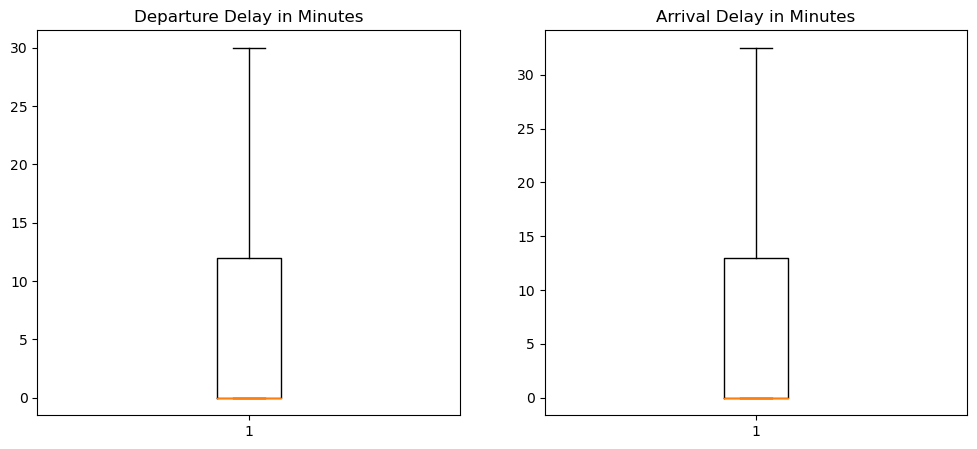

In [38]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
plt.boxplot(train_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes')
plt.subplot(122)
plt.boxplot(train_data['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes');

In [39]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,8.700363,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,7.442705,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,10.555440,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,9.093417,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,7.274564,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Drop unnecessary columns

In [40]:
train_data=train_data.drop(['Unnamed: 0', 'id'],axis=1) 
test_data=test_data.drop(['Unnamed: 0', 'id'],axis=1)

# Data Preprocessing

## Seperate the Target variable and features

In [41]:
X = train_data.drop('satisfaction',1)
y = train_data.satisfaction

In [42]:
test_X = test_data.drop('satisfaction',1)
test_y = test_data.satisfaction

## Perform feature Encoding for categorical data

In [43]:
# One hot encoding
X=pd.get_dummies(X) 
test_X=pd.get_dummies(test_X)

In [44]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,8.700363,3,4,3,1,5,3,5,5,...,18.0,0,1,1,0,0,1,0,0,1
1,25,7.442705,3,2,3,3,1,3,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,10.555440,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,1,0,0
3,25,9.093417,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,7.274564,3,3,3,3,4,5,5,3,...,0.0,0,1,1,0,1,0,1,0,0


**Observation:**
* For features with only 2 labels instead of keeping 2 columns it is better to keep only one column which contain 0 or 1

In [45]:
X.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel'],axis=1,inplace=True)
test_X.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel'],axis=1,inplace=True)

In [46]:
X.rename(columns={'Gender_Female':'Gender','Customer Type_Loyal Customer':'Customer Type','Type of Travel_Business travel':'Type ofTravel'})
test_X.rename(columns={'Gender_Female':'Gender','Customer Type_Loyal Customer':'Customer Type','Type of Travel_Business travel':'Type of Travel'})

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44,1,1,1,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0,1,1,1,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0,0,0,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6,0,1,1,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0,0,0,1,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0,0,1,1,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0,1,1,0,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,0,0,0,1,1,1,0,0


## Split the dataset

In [47]:
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.3)

In [48]:
x_train.shape, x_val.shape , y_train.shape, y_val.shape, test_X.shape ,test_y.shape

((72732, 24), (31171, 24), (72732,), (31171,), (25976, 24), (25976,))

# Model with default parameters

In [49]:
score = {}

In [50]:
def defaultpara_model(model):
    
    model.fit(x_train,y_train)
    pred = model.predict(x_val)
    pred_test = model.predict(test_X)
    return model.score(x_train,y_train), accuracy_score(y_val,pred), accuracy_score(test_y,pred_test)

### KNN

In [51]:
train_score,val_score,test_score = defaultpara_model(KNeighborsClassifier())
score.update({'KNN':[train_score,val_score,test_score]})

### SVC

In [52]:
train_score_s,val_score_s,test_score_s =defaultpara_model(SVC())
score.update({'SVC':[train_score_s,val_score_s,test_score_s]})

### Gaussian NB

In [53]:
train_score_n,val_score_n,test_score_n = defaultpara_model(GaussianNB())
score.update({'GaussianNB':[train_score_n,val_score_n,test_score_n]})

### Decision Tree

In [54]:
train_score_d,val_score_d,test_score_d = defaultpara_model(DecisionTreeClassifier())
score.update({'Decision Tree':[train_score_d,val_score_d,test_score_d]})

### Random Forest

In [55]:
train_score_r,val_score_r,test_score_r = defaultpara_model(RandomForestClassifier())
score.update({'Random Forest':[train_score_r,val_score_r,test_score_r]})

In [56]:
score_df = pd.DataFrame(score,index=['Train','Validation','Test'])

df_styled = score_df.style.highlight_max(subset=score_df.columns[:],axis=1)
df_styled

,KNN,SVC,GaussianNB,Decision Tree,Random Forest
Train,0.918647,0.892344,0.855057,1.000000,1.000000
Validation,0.881428,0.892400,0.854641,0.945077,0.961118
Test,0.541962,0.438982,0.438982,0.905374,0.958154


**Obsevation:**
* From above DataFrame we can conclude that by using default parameters Random Forest having more accuracy

# Train Model by using StratifiedKFold

* Stratified K-Folds cross-validator provides train/test indices to split data in train/test sets. 

* This cross-validation object is a variation of KFold that returns stratified folds. 

* The folds are made by preserving the percentage of samples for each class.

In [57]:
def stratifiedk(model):
    i=1 
    kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
    for train_index,test_index in kf.split(X,y):     
        print('\n{} of kfold {}'.format(i,kf.n_splits))     
        xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
        ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
        model.fit(xtr, ytr)   
        print('train score : ',model.score(xtr,ytr))
        pred_test = model.predict(xvl)     
        score = accuracy_score(yvl,pred_test)     
        print('val_score : ',score)     
        i+=1

    pred_test = model.predict(test_X) 
    return accuracy_score(test_y,pred_test)

### Decision Tree

In [58]:
stratifiedk(DecisionTreeClassifier(random_state=1))


1 of kfold 5
train score :  1.0
val_score :  0.9455271642365622

2 of kfold 5
train score :  1.0
val_score :  0.9462970983109571

3 of kfold 5
train score :  1.0
val_score :  0.9428323949761802

4 of kfold 5
train score :  1.0
val_score :  0.9445139557266603

5 of kfold 5
train score :  1.0
val_score :  0.9454764196342638


0.8653372343701878

### Random Forest

In [59]:
stratifiedk(RandomForestClassifier(random_state=1, max_depth=10))


1 of kfold 5
train score :  0.9487139385481581
val_score :  0.9424955488186324

2 of kfold 5
train score :  0.9484252063232357
val_score :  0.9433617246523266

3 of kfold 5
train score :  0.9474627655734944
val_score :  0.9438910543284731

4 of kfold 5
train score :  0.9485581607978538
val_score :  0.9439846005774783

5 of kfold 5
train score :  0.948461917880731
val_score :  0.9476419634263715


0.946181090237142

### KNN

In [60]:
stratifiedk(KNeighborsClassifier(n_neighbors=6))


1 of kfold 5
train score :  0.9089290440557253
val_score :  0.881959482219335

2 of kfold 5
train score :  0.9097471186930055
val_score :  0.8818632404600356

3 of kfold 5
train score :  0.9096629051274031
val_score :  0.8801308887926471

4 of kfold 5
train score :  0.9089542004018142
val_score :  0.8812800769971126

5 of kfold 5
train score :  0.9079677105013053
val_score :  0.8850818094321463


0.582768709578072

### Gaussian NB

In [61]:
stratifiedk(GaussianNB())


1 of kfold 5
train score :  0.8559226197637207
val_score :  0.8541937346614696

2 of kfold 5
train score :  0.8552850027670171
val_score :  0.8543380973004187

3 of kfold 5
train score :  0.8559707418012079
val_score :  0.8527501082719792

4 of kfold 5
train score :  0.8547213166031062
val_score :  0.8570259865255053

5 of kfold 5
train score :  0.8543002538406939
val_score :  0.85832531280077


0.4389821373575608

**Observation:**
* After using StratifiedKFold Random Forest Classifier work better than other classification model 
    
    train score : 0.948461917880731
    
    val_score :  0.9476419634263715
    
    test_score : 0.946181090237142

# Hyperparameter Tunning

When you're training machine learning models, each dataset and model needs a different set of hyperparameters, which are a kind of variable. 

The only way to determine these is through multiple experiments, where you pick a set of hyperparameters and run them through your model. This is called hyperparameter tuning.

For this here we are going to use RandomizedSearchCV and GridSearchCV

## Define model and it's hyperparameters for Hyperparameter tunning

In [62]:
model_knn = KNeighborsClassifier()

hyper_para = {'metric' : ['euclidean','minkowski','manhattan'],
             'n_neighbors' :range(3,11)}


dt = DecisionTreeClassifier()

param_dt = {"max_depth": range(3,6),
              "max_features": range(1,11),
              "min_samples_split": range(2,11),
              "criterion": ["gini", "entropy"]}

## RandomizedSearchCV

In [63]:
def randomized(model,para,cv=5):
    
    random_search = RandomizedSearchCV(model,param_distributions=para,cv=cv,n_iter=10)
    random_search.fit(x_train,y_train)
    
    pred_val = random_search.predict(x_val)
    pred_y = random_search.predict(test_X)
    
    print(f'train score : {random_search.score(x_train,y_train)} ,\
    \nval score :  {accuracy_score(y_val,pred_val)},\
    \ntest score :  {accuracy_score(test_y,pred_y)}')
    
    return random_search.best_params_

### KNN

In [64]:
randomized(model_knn,hyper_para)

train score : 0.9376065555738877 ,    
val score :  0.9105258092457733,    
test score :  0.8882814906067139


{'n_neighbors': 5, 'metric': 'manhattan'}

### Decision Tree

In [65]:
randomized(dt,param_dt)

train score : 0.8981328713633614 ,    
val score :  0.898976612877354,    
test score :  0.8967123498614106


{'min_samples_split': 5,
 'max_features': 10,
 'max_depth': 5,
 'criterion': 'entropy'}

**Observation:**
* By RandomizedSearchCV KNN {'n_neighbors': 9, 'metric': 'manhattan'}
* Decision Tree {'min_samples_split': 7,'max_features': 9,'max_depth': 4,'criterion': 'entropy'}


## GridSearchCV

In [66]:
def gridsearch(model,para,cv=5):
    grid_search = GridSearchCV(model,param_grid=para, cv=cv)
    grid_search.fit(x_train,y_train)
    pred_val = grid_search.predict(x_val)
    pred_y = grid_search.predict(test_X)
    print(f' train score : {grid_search.score(X,y)} , \
    \nval score :  {accuracy_score(y_val,pred_val)}, \
    \ntest score :  {accuracy_score(test_y,pred_y)}')
    
    return grid_search.best_params_

### KNN

In [67]:
gridsearch(model_knn,hyper_para)

 train score : 0.9223506539753424 ,     
val score :  0.912322350903083,     
test score :  0.8893979057591623


{'metric': 'manhattan', 'n_neighbors': 9}

### Decision Tree

In [68]:
gridsearch(dt,param_dt)

 train score : 0.9044782152584622 ,     
val score :  0.9071572936383177,     
test score :  0.9036803202956575


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_split': 7}

**Observation:**
* by gridsearchcv for KNN hyperparameters are {'metric': 'manhattan', 'n_neighbors': 9} which is same as randomizedsearchcv
* for decision Tree {'criterion': 'gini','max_depth': 5,'max_features': 10,'min_samples_split': 7}
* We get Best Accuracy from gridsearchcv for decision tree

# Feature selection and Feature importance

* Feature selection is a process in machine learning to identify important features in a dataset to improve the performance.
* Techniques are SelectKBest, SequentialFeatureSelector,so on.
* Feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model. 
* These scores are calculated using a variety of techniques, such as decision trees, random forests, Permutation, LOFO,so on.

## SelectKBest (Feature selection)

In [69]:
feature = SelectKBest(chi2, k=15).fit(x_train,y_train)
feature.get_feature_names_out()

array(['Age', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco'], dtype=object)

**Observation:**
* From feature selection we only get the name of features which are important for prediction but not get score of importance

## Random Forest (Feature importance)

<Axes: >

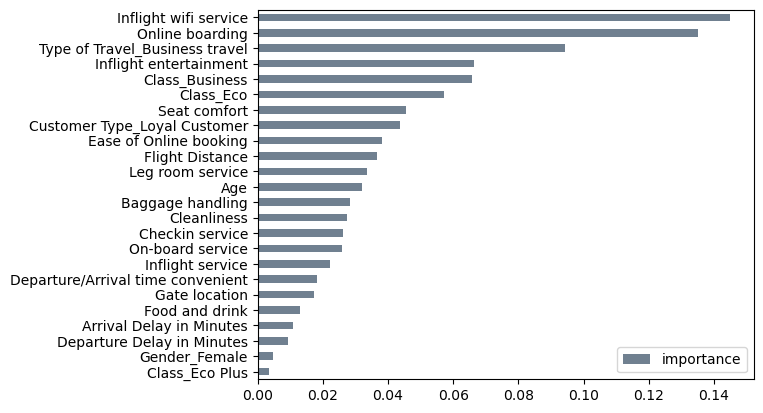

In [70]:
# Feature importance
model_RF = RandomForestClassifier(100)
model_RF.fit(x_train,y_train)
features_imp =pd.DataFrame({'importance': model_RF.feature_importances_}, index= X.columns).sort_values('importance')
features_imp.plot.barh(color='slategray')

In [71]:
features_imp[features_imp['importance'] > 0.03].index

Index(['Age', 'Leg room service', 'Flight Distance', 'Ease of Online booking',
       'Customer Type_Loyal Customer', 'Seat comfort', 'Class_Eco',
       'Class_Business', 'Inflight entertainment',
       'Type of Travel_Business travel', 'Online boarding',
       'Inflight wifi service'],
      dtype='object')

**Observation:**
* From RandomForestClassfier we get importance  scores for each and every features.
* Here you can see Online boarding is most important feature and Class_Eco Plus and Gender having less importance 

# Fit the Model on selected features and hyperparameter tunning

Now, we'll try to train our model by using selected features and hyperparameter which is calculated earlier

In [72]:
X_imp =X[features_imp[features_imp['importance'] > 0.03].index]
X_imp.head()

,Age,Leg room service,Flight Distance,Ease of Online booking,Customer Type_Loyal Customer,Seat comfort,Class_Eco,Class_Business,Inflight entertainment,Type of Travel_Business travel,Online boarding,Inflight wifi service
0,13,3,8.700363,3,1,5,0,0,5,0,3,3
1,25,5,7.442705,3,0,1,0,1,1,1,3,3
2,26,3,10.555440,2,1,5,0,1,5,1,5,2
3,25,5,9.093417,5,1,2,0,1,2,1,2,2
4,61,4,7.274564,3,1,5,0,1,3,1,5,3


In [73]:
test_X_imp =test_X[features_imp[features_imp['importance'] > 0.03].index]
test_X_imp.head()

,Age,Leg room service,Flight Distance,Ease of Online booking,Customer Type_Loyal Customer,Seat comfort,Class_Eco,Class_Business,Inflight entertainment,Type of Travel_Business travel,Online boarding,Inflight wifi service
0,52,5,160,3,1,3,1,0,5,1,4,5
1,36,4,2863,3,1,5,0,1,4,1,4,1
2,20,1,192,2,0,2,1,0,2,1,2,2
3,44,1,3377,0,1,4,0,1,1,1,4,0
4,49,2,1182,4,1,2,1,0,2,1,1,2


In [74]:
xi_train, xi_val, yi_train, yi_val = train_test_split(X_imp,y, test_size =0.3)

In [75]:
score_imp = {}

### KNN

In [76]:
knn = KNeighborsClassifier(n_neighbors= 9, metric= 'manhattan')
knn.fit(xi_train,yi_train)
pred_knn = knn.predict(xi_val)
pred_test = knn.predict(test_X_imp)
score_imp.update({'KNN':[knn.score(xi_train,yi_train), accuracy_score(yi_val,pred_knn), accuracy_score(test_y,pred_test)]})

### Decision Tree

In [77]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth= 5,max_features= 10,min_samples_split= 7)
dt.fit(xi_train,yi_train)
pred_dt = dt.predict(xi_val)
pred_test = dt.predict(test_X_imp)
score_imp.update({'Decision Tree':[dt.score(xi_train,yi_train), accuracy_score(yi_val,pred_dt), accuracy_score(test_y,pred_test)]})

### Gaussian Naive Bayes

In [78]:
nb = GaussianNB()
nb.fit(xi_train,yi_train)
pred_nb = nb.predict(xi_val)
pred_test = nb.predict(test_X_imp)
score_imp.update({'NB':[nb.score(xi_train,yi_train), accuracy_score(yi_val,pred_nb), accuracy_score(test_y,pred_test)]})

### Random Forest Classifier (Ensemble learning technique)

In [79]:
rfc = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_depth= 5,max_features= 10,min_samples_split= 7)
rfc.fit(xi_train,yi_train)
pred_rfc = rfc.predict(xi_val)
pred_test = rfc.predict(test_X_imp)
score_imp.update({'Random Forest':[rfc.score(xi_train,yi_train), accuracy_score(yi_val,pred_rfc), accuracy_score(test_y,pred_test)]})

### Voting Classifier (Bagging Technique)

In [80]:
vote_model=VotingClassifier(estimators=[('KNN',knn),('DT',dt),('NB',nb),('RFC', rfc)], voting='hard')
vote_model.fit(xi_train,yi_train)
pred_vote=vote_model.predict(xi_val)
pred_test = vote_model.predict(test_X_imp)
score_imp.update({'Voting Classifier':[vote_model.score(xi_train,yi_train), accuracy_score(yi_val,pred_vote), accuracy_score(test_y,pred_test)]})

### Extreme Gradient Boosting Classifier (XG Boost) (Boosting Technique)

In [81]:
new_yi_train=yi_train.copy()
new_yi_val=yi_val.copy()
new_test_y=test_y.copy()

In [82]:
new_yi_train.replace({'satisfied':1,'neutral or dissatisfied':0},inplace = True)
new_yi_val.replace({'satisfied':1,'neutral or dissatisfied':0},inplace = True)
new_test_y.replace({'satisfied':1,'neutral or dissatisfied':0},inplace = True)

In [83]:
model_xg = XGBClassifier(n_estimators=50, max_depth=4) 
model_xg.fit(xi_train,new_yi_train)
pred_xg=model_xg.predict(xi_val)
pred_test = model_xg.predict(test_X_imp)
score_imp.update({'XGBoost Classifier':[model_xg.score(xi_train,new_yi_train), accuracy_score(new_yi_val,pred_xg), accuracy_score(new_test_y,pred_test)]})

### Score

In [84]:
df = pd.DataFrame(score_imp,index=['Train','Validation','Test'])

df_styled = df.style.highlight_max(subset=df.columns[:],axis=1)
df_styled

,KNN,Decision Tree,NB,Random Forest,Voting Classifier,XGBoost Classifier
Train,0.938899,0.910177,0.844855,0.926264,0.931777,0.944577
Validation,0.925925,0.910333,0.846011,0.926278,0.928267,0.944018
Test,0.901063,0.909070,0.438982,0.926317,0.930667,0.943833


**Observation:**
* Here XGBoost shows much better accuracy than other model

# Evaluation Metric

Confusion Matrix and classification report of top two classifiation model (XGBoost , RandomForest)

### Random Forest

<Axes: >

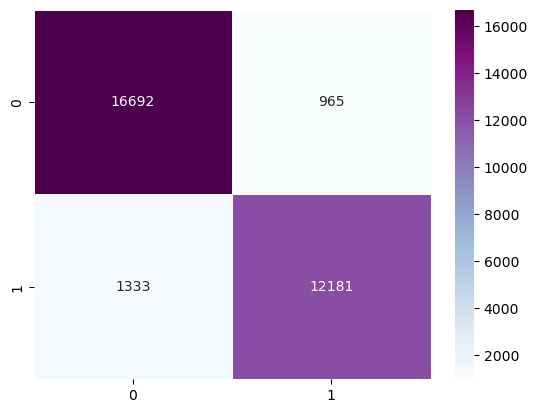

In [85]:
sns.heatmap(confusion_matrix(yi_val,pred_rfc),annot=True,linewidths=0.5,fmt='d',cmap='BuPu')

In [86]:
print(classification_report(yi_val,pred_rfc))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     17657
              satisfied       0.93      0.90      0.91     13514

               accuracy                           0.93     31171
              macro avg       0.93      0.92      0.92     31171
           weighted avg       0.93      0.93      0.93     31171



### XGBclassifier

<Axes: >

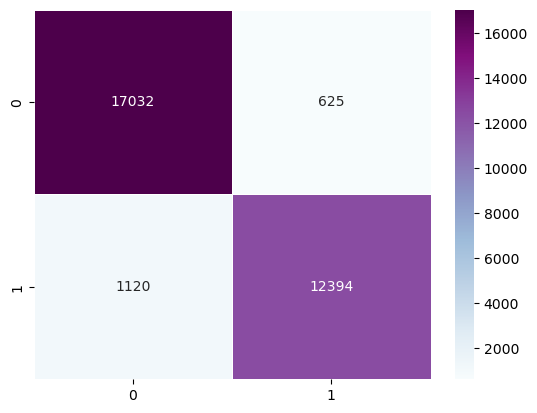

In [87]:
# 'satisfied':1,'neutral or dissatisfied':0
sns.heatmap(confusion_matrix(new_yi_val,pred_xg),annot=True,linewidths=0.5,fmt='d',cmap='BuPu')

In [88]:
print(classification_report(new_yi_val,pred_xg))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17657
           1       0.95      0.92      0.93     13514

    accuracy                           0.94     31171
   macro avg       0.95      0.94      0.94     31171
weighted avg       0.94      0.94      0.94     31171



## Prediction result by using XG boost

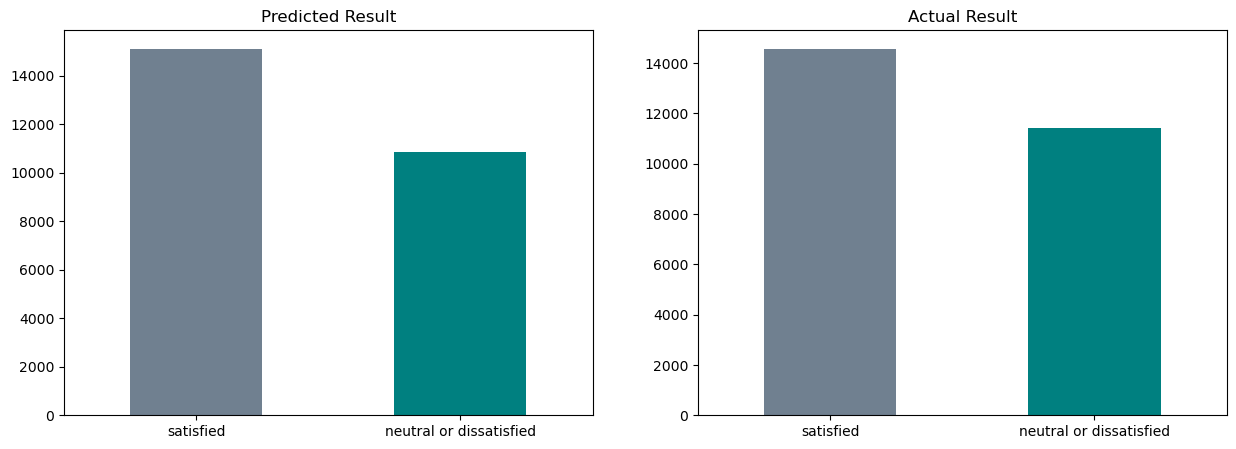

In [89]:
plt.figure(1,figsize=(15,5))

plt.subplot(121)
pd.Series(pred_test).replace({0:'satisfied',1:'neutral or dissatisfied'}).value_counts().plot.bar(color=['slategray','teal'])
plt.xticks(rotation=360)
plt.title('Predicted Result')

plt.subplot(122)
pd.Series(new_test_y).replace({0:'satisfied',1:'neutral or dissatisfied'}).value_counts().plot.bar(color=['slategray','teal'])
plt.xticks(rotation=360)
plt.title('Actual Result');

# Conclusion

* From above observation we concluded that in comparision to other models Random forest works more better.
* But after using hyperparameter tunning and feature importance to train the all 6 models, we concluded that the boosting model works much better than other models
* XGBOOST works better than Random Forest.